<div class="alert alert-block alert-info">
<font size="5">
<center><b>АНАЛИЗ БИЗНЕС-ПОКАЗАТЕЛЕЙ РЕКЛАМНЫХ КАМПАНИЙ</b></center>
</font>
    </div> 

## Описание проекта

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**

В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

<span class="mark">Структура visits_info_short.csv:</span>
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

<span class="mark">Структура orders_info_short.csv:</span>
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

<span class="mark">Структура costs_info_short.csv:</span>
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.


## Bыполнение проекта

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# Загружаем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import seaborn as sns


#### Откроем файл `datasets/visits_info_short.csv` с данными и изучим общую информацию

In [2]:
# Откроем файл `datasets/visits_info_short.csv`, сохраните датафрейм в переменную `visits`.
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')

In [3]:
# Изучаем таблицу
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# Заменим названия столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()
visits.head(3)

,user id,region,device,channel,session start,session end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


In [5]:
# Переименуем столбцы
visits = visits.rename(columns= {'session start': 'session_start', 'session end':'session_end', 'user id':'user_id'})
visits.head(3)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


In [6]:
# Изучаем столбцы и их типы
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
# преобразуем данные о времени для дальнейших расчётов
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
visits.head(3)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


In [9]:
# Проверим наличие пропусков в каждом столбце(%)
pd.DataFrame(round(visits.isna().mean()*100,)).style.background_gradient('BuPu')

,0
user_id,0.000000
region,0.000000
device,0.000000
channel,0.000000
session_start,0.000000
session_end,0.000000


In [10]:
# Проверим наличие дубликатов
visits.duplicated().sum()

0

#### Откроим файл `datasets/orders_info_short.csv` с данными и изучим общую информацию

In [11]:
# Откройте файл `datasets/datasets/orders_info_short.csv`, сохраните датафрейм в переменную `orders`
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')

In [12]:
# Изучаем таблицу
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
# Заменим названия столбцов к нижнему регистру
orders.columns = orders.columns.str.lower()
orders.head(3)

,user id,event dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


In [14]:
# Переименуем столбцы
orders = orders.rename(columns= {'user id': 'user_id', 'event dt':'event_dt'})
orders.head(3)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


In [15]:
# Изучаем столбцы и их типы
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [16]:
# преобразуем данные о времени для дальнейших расчётов
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [17]:
# Проверим наличие пропусков в каждом столбце(%)
pd.DataFrame(round(orders.isna().mean()*100,)).style.background_gradient('BuPu')

,0
user_id,0.000000
event_dt,0.000000
revenue,0.000000


In [18]:
# Проверим наличие дубликатов
orders.duplicated().sum()

0

#### Откроим файл `datasets/costs_info_short.csv` с данными и изучим общую информацию

In [19]:
# Откройте файл `datasets/costs_info_short.csv`, сохраните датафрейм в переменную `costs`
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv') 

In [20]:
# Изучаем таблицу
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [21]:
# Заменим названия столбцов к нижнему регистру
costs.columns = costs.columns.str.lower()
costs.head(3)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


In [22]:
# Изучаем столбцы и их типы
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [23]:
# преобразуем данные о времени для дальнейших расчётов
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [24]:
# Проверим наличие пропусков в каждом столбце(%)
pd.DataFrame(round(costs.isna().mean()*100,)).style.background_gradient('BuPu')

,0
dt,0.000000
channel,0.000000
costs,0.000000


In [25]:
# Проверим наличие дубликатов
costs.duplicated().sum()

0

**`ВЫВОД`**: 
<div style="border:solid orange 2px; padding: 20px"> 

В исходном датасете 'visits' 309901 строк и 6 столбцов, 'orders' 40212 строк и 3 столбца и 'costs' 1800 строк и 3 столбца.
                 
    
После того, как изучили датасеты, выявили следующие первичные отклонения:
    
<span class="birk">'visits'</span>   
1) `session_start` и `session_end`- не соответствует тип колонки object. Поменяли на datetime \
2) Заменим названия столбцов к нижнему регистру.
3) Скорректировали названия столбцов.
    
<span class="birk">'orders'</span>
1) `event_dt`- не соответствует тип колонки object. Поменяли на datetime \
2) Заменим названия столбцов к нижнему регистру.
3) Скорректировали названия столбцов.
    
<span class="birk">'costs'</span> 
1) `'dt'`- преобразовали данные о времени для дальнейших расчётов с помощью метода `.dt.date` \
2) Заменим названия столбцов к нижнему регистру.
3) Скорректировали названия столбцов.

Пропуски, дубликаты не выявлены.    
</div>

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания профилей пользователей `get_profiles()`

In [26]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#### Функция для  удержания пользователей `get_retention()`

In [27]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time



#### Функция для расчета конверсии `get_conversion()`

In [28]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time



#### Функция для расчёта LTV и ROI `get_ltv()`

In [29]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

А также напишем функции для визуализации этих метрик — `filter_data()`, `plot_retention()`, `plot_conversion()` и `plot_ltv_roi()`.

#### Функция для для сглаживания фрейма `filter_data()`

In [30]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для визуализации удержания `plot_retention()`

In [61]:
# функция для визуализации удержания
    
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для визуализации конверсии  `plot_conversion()`

In [32]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI `plot_ltv_roi()`

In [33]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Получим профили пользователей

- Для этого вызовем функцию `get_profiles()`, передав ей данные о посещениях, покупках и тратах на рекламу приложения Procrastinate Pro+.

In [34]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


<span class="mark">**Наблюдение:**</span> Итого — 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения приложения, девайсы из которых заходили пользователи, страны и рекламном источнике, который мотивировал пользователя посетить данное приложение. Такие данные значительно упрощают дальнейший анализ.

##### Определим минимальную и максимальную даты привлечения пользователей.

In [35]:
profiles.groupby('channel').agg({'first_ts': ['min', 'max']}
    )

first_ts                    
                                   min                 max
channel                                                   
AdNonSense         2019-05-01 00:01:35 2019-10-27 23:55:23
FaceBoom           2019-05-01 00:06:40 2019-10-27 23:54:35
LeapBob            2019-05-01 00:05:17 2019-10-27 23:53:54
MediaTornado       2019-05-01 00:00:41 2019-10-27 23:03:08
OppleCreativeMedia 2019-05-01 00:17:03 2019-10-27 23:56:13
RocketSuperAds     2019-05-01 00:28:20 2019-10-27 23:29:55
TipTop             2019-05-01 00:09:40 2019-10-27 23:59:04
WahooNetBanner     2019-05-01 00:32:01 2019-10-27 23:14:31
YRabbit            2019-05-01 02:13:26 2019-10-27 23:37:21
lambdaMediaAds     2019-05-01 01:32:09 2019-10-27 22:19:09
organic            2019-05-01 00:02:38 2019-10-27 23:55:42

<span class="mark">**Наблюдение:**</span> Из таблицы видно, что минимальная дата привлечения пользователей была 1 мая 2019 года, а максимальная 27 октября 2019 года.

##### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 

Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны

In [36]:
countries_users = ( 
    profiles.groupby('region')
    .agg({'user_id': 'count', 'payer':'sum'})
    .rename(columns={'user_id': 'Кол-во пользователей','payer': 'Кол-во плательщиков'})
    .reset_index()
)

countries_users['Доля плательщиков(%)']= 100*(countries_users['Кол-во плательщиков'] /countries_users['Кол-во пользователей'])
countries_users.sort_values(by='Доля плательщиков(%)', ascending=False).style.format({'Доля плательщиков(%)':'{:.2f}%'})
#countries_users.style.bar(subset=['Кол-во пользователей', 'Кол-во плательщиков', 'Доля плательщиков(%)'], color='#fdfd1f')



,region,Кол-во пользователей,Кол-во плательщиков,Доля плательщиков(%)
3,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%


<span class="mark">**Наблюдение:**</span> Основное количество пользователей пришло из <font color='green'>**США**</font> в размере <font color='green'>**100 002 человека**</font> и их них доля плательщиков составила почти <font color='green'>**7%**</font>.

##### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [37]:
devices_users = ( 
    profiles.groupby('device')
    .agg({'user_id': 'count', 'payer':'sum'})
    .rename(columns={'user_id': 'Кол-во пользователей','payer': 'Кол-во плательщиков'})
    .reset_index()
)

devices_users['Доля плательщиков(%)']= 100*(devices_users['Кол-во плательщиков'] /devices_users['Кол-во пользователей'])
devices_users.sort_values(by='Доля плательщиков(%)', ascending=False).style.format({'Доля плательщиков(%)':'{:.2f}%'})


,device,Кол-во пользователей,Кол-во плательщиков,Доля плательщиков(%)
1,Mac,30042,1912,6.36%
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


<span class="mark">**Наблюдение:**</span> Основное количество пользователей в размере <font color='green'>**54 459 человек**</font> пришло в приложение через устройство **IPhone**, хотя основной долей плательщиков являются пользователи устройства **MAC- 6.36%**. 

<span class="pirk">**Рекомендация:**</span> Возможно стоит обратить внимание на юзобилити мобильного приложения, тк есть возможность увеличить долю плательщиков.

##### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. 

Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [38]:
sourses_users = ( 
    profiles.groupby('channel')
    .agg({'user_id': 'count', 'payer':'sum'})
    .rename(columns={'user_id': 'Кол-во пользователей','payer': 'Кол-во плательщиков'})
    .reset_index()
)

sourses_users['Доля плательщиков(%)']= 100*(sourses_users['Кол-во плательщиков'] /sourses_users['Кол-во пользователей'])
sourses_users.sort_values(by='Доля плательщиков(%)', ascending=False).style.format({'Доля плательщиков(%)':'{:.2f}%'})

,channel,Кол-во пользователей,Кол-во плательщиков,Доля плательщиков(%)
1,FaceBoom,29144,3557,12.20%
0,AdNonSense,3880,440,11.34%
9,lambdaMediaAds,2149,225,10.47%
6,TipTop,19561,1878,9.60%
5,RocketSuperAds,4448,352,7.91%
7,WahooNetBanner,8553,453,5.30%
8,YRabbit,4312,165,3.83%
3,MediaTornado,4364,156,3.57%
2,LeapBob,8553,262,3.06%
4,OppleCreativeMedia,8605,233,2.71%


<span class="mark">**Наблюдение:**</span> Основное количество пользователей в размере <font color='green'>**54 439 человек(2.06%)**</font> пришло в приложение через **ogranic (поисковики Google, Yandex и пр)**. НО, основной долей плательщиков являются пользователи, которые пришли через такие источники, как **FaceBoom	- 12.20%, AdNonSense- 11.34% и lambdaMediaAds- 10.47%(или всего 35 173 человека-34%)**.

<span class="pirk">**Рекомендация:**</span> Стоит обратить внимание на позиционирование в поисковых системах и выдачу ссылок по ключевым словам (SEO). При правильном позиционировании в посковых системах, есть возможность увеличить долю плательщиков.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг

In [39]:
print('Общая сумма расходов на маркеринг:', costs['costs'].sum().round(2))

Общая сумма расходов на маркеринг: 105497.3


<span class="mark">**Наблюдение:**</span>  Общая сумма расходов на маркетинг в период с 01.05.2019 по 27.10.2016 составила **105 497.3**

#### Распределим траты по рекламным источникам. Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отразим это на одном графике.

In [40]:
#создадим столбцы с месяцами и неделями
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

total_costs = costs.pivot_table(index='channel', columns= 'month', values=['costs'],\
               aggfunc={'costs': 'sum' }).reset_index()

total_costs['total'] = total_costs.iloc[:,1:].apply(lambda x: sum(x), axis = 1)
total_costs.sort_values(by='total', ascending=False)

channel    costs                                         \
month                            5         6        7         8         9   
6                  TipTop  2981.00  6675.600  8410.20  11202.00  13232.50   
1                FaceBoom  3524.40  5501.100  5294.30   6274.40   6114.90   
7          WahooNetBanner   418.80   921.000   851.40   1040.40    977.40   
0              AdNonSense  1169.70   538.650   504.00    579.60    581.70   
4      OppleCreativeMedia   169.75   370.000   366.50    439.25    427.75   
5          RocketSuperAds   577.98   325.715   252.07    253.11    218.40   
2                 LeapBob   140.28   314.580   313.53    369.81    343.98   
9          lambdaMediaAds   458.40   199.200   219.20    220.00    247.20   
3            MediaTornado   238.56   138.000   138.48    154.56    144.72   
8                 YRabbit   299.70   106.200    97.38    124.74    152.79   

                     total  
month         10            
6      12250.000  54751.30  
1       5736.500  32445.60  
7        942.000   5151.00  
0        537.600   3911.25  
4        378.000   2151.25  
5        205.725   1833.00  
2        315.420   1797.60  
9        213.600   1557.60  
3        140.160    954.48  
8        163.410    944.22

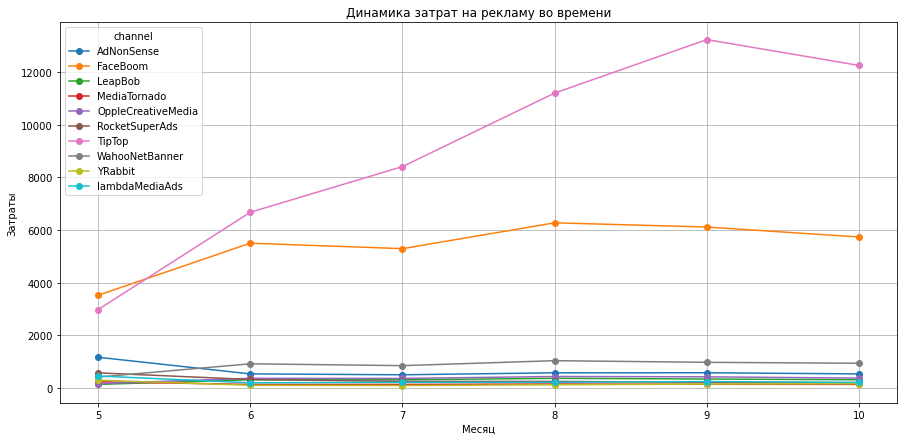

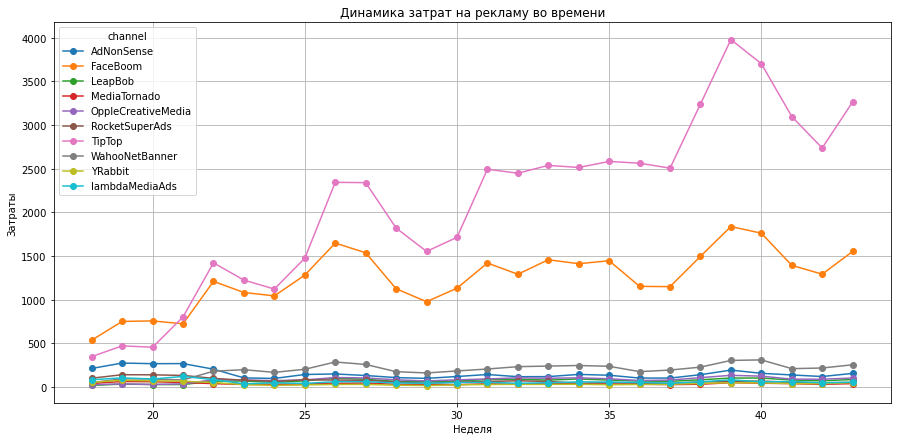

In [41]:
#построим график по месяцам
costs.pivot_table(index=['month'], columns='channel', values='costs', aggfunc='sum')\
     .plot(figsize=(15,7),grid=True, marker='o')

plt.title('Динамика затрат на рекламу во времени')
plt.xlabel('Месяц')
plt.ylabel('Затраты')

plt.show()

#построим график по неделям
costs.pivot_table(index=['week'], columns='channel', values='costs', aggfunc='sum')\
     .plot(figsize=(15,7),grid=True,  marker='o')
plt.title('Динамика затрат на рекламу во времени')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()

<span class="mark">**Наблюдение:**</span> 
По графику видно, что тенденция затрат была задана либо в мае(18 неделя), либо раньше. Лидерами, как было выявлено на предыдущем этапе, являются TipTop и FaceBoom.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

Чтобы рассчитать и проанализировать CAC, добавим данные о тратах на рекламу в пользовательские профили.

In [42]:
profiles.pivot_table(index=['channel'], values='acquisition_cost', aggfunc='mean')\
        .sort_values(by='acquisition_cost',ascending=False)\
        .rename(columns={'channel':'Источник','acquisition_cost': 'CAC'})\
        .reset_index()\
        .round(2)


,channel,CAC
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


In [43]:
# Средняя стоимость привлечения клиента по всем источникам
round(profiles['acquisition_cost'].mean(),2)

0.7

<span class="mark">**Наблюдение:**</span> Согласно таблице, самой **дорогой стоимостью** за привлечение одного пользователя считается источник TipTop (2.80) и превышает среднюю стоимоть привлечения клиентов (0.70) в <font color='red'>**4 раза**</font>
</span>. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Примечание:** Из анализа исключаем органических пользователей, так как на них не были потрачены средства.

In [44]:
# исключаем органических пользователей
profiles = profiles.query('channel != "organic"')

Определяем момент и горизонт анализа

In [45]:
observation_date = datetime(2019, 11, 1).date()   
horizon_days = 14

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

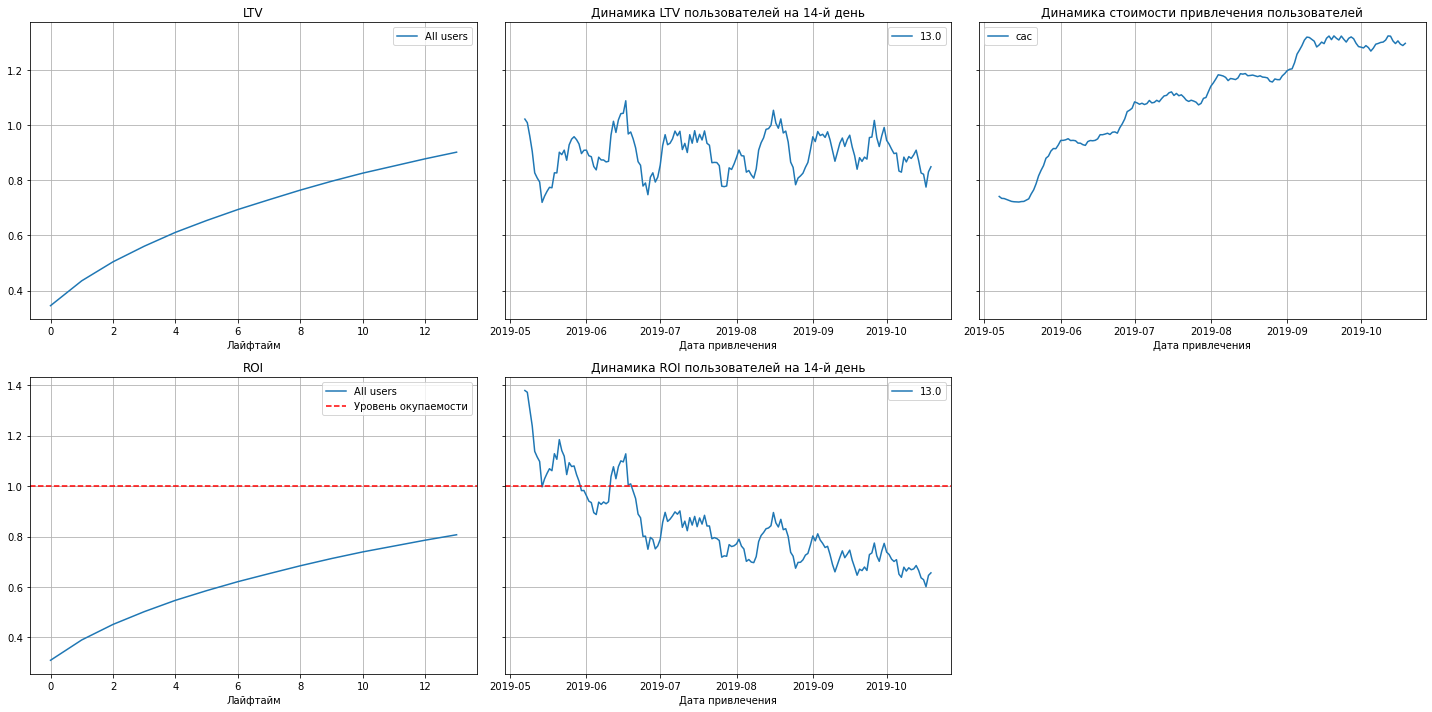

In [46]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<span class="mark">**Наблюдение:**</span> 
- LTV показатель достаточно стабилен и имеет восходящий тренд. 
- Реклама не окупается. ROI не выше 80%. Наблюдается неэффективность вложений в маркетинг с июня 2019 года. 
- CAC значительно увеличился. Привлечение одного клиента стало сильно расти с июня 2019 года.  

<span class="pirk">**Рекомендация:**</span> Стоит детально проанализировать рекламные источники на предмет эффективности.

#### Проверим конверсию пользователей и динамику её изменения. Построим и изучим график конверсии в разрезе устройств, стран и рекламных каналов.

<div style="border:solid red 2px; padding: 20px">
!!! Проверка: Для начала сверим количество уникальных пользователей за изучаемый период по столбцу user_id в профилях и сумму значений cohort_size из таблицы конверсии.</div>

In [48]:
# сумма размеров когорт равна числу новых клиентов в изучаемый период?
 
check = profiles.query(
    # в профилях находим пользователей, привлечённых с 01.05.2019 по 01.11.2019 
    'dt <= datetime(2019, 10, 19).date()'
)
print(
    # считаем уникальных пользователей в профилях и складываем размеры когорт
    'Общее количество новых пользователей: {} {}'.format(
        len(check['user_id'].unique()), conversion['cohort_size'].sum()
    )
)

Общее количество новых пользователей: 88644 88644


Количество пользователей совпадает — здесь проблем нет.

Оценим кривую конверсии. Если всё в порядке, она будет приближённо подчиняться закону 1-e^{-(x/a+b)}1−e 
−(x/a+b)
 , где коэффициент aa задаёт кривизну линии, а bb — конверсию первого дня. Проще говоря, кривая должна начинаться на уровне конверсии первого дня и затем бесконечно приближаться к единице.

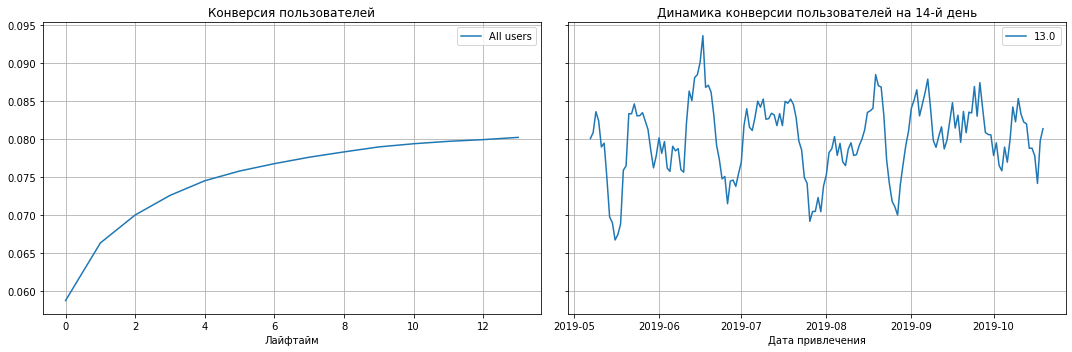

In [49]:
# строим графики кривой конверсии и  истории изменений конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
   profiles, 
   orders,
   observation_date,
   horizon_days, 
   dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Проверим, есть ли в таблице конверсии значений больше 1.

In [50]:
# Сделаем срез таблицы конверсии по условию > 1, а остальные заменим на пустую методом fillna()
print(conversion[conversion > 1].fillna(''))

           cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0  \
cohort                                                                          
All users        88644                                                          

          13.0  
cohort          
All users       


В таблице конверсии остался только размер когорты — CR выше единицы нет.

То же самое проделаем с таблицей динамики конверсии.

In [51]:
print(conversion_history[conversion_history > 1].fillna(''))

            cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0  \
dt                                                                          
2019-05-01          390                                                     
2019-05-02          323                                                     
2019-05-03          346                                                     
2019-05-04          457                                                     
2019-05-05          438                                                     
...                 ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   
2019-10-15          442                                                     
2019-10-16          436                                                     
2019-10-17          449                                                     
2019-10-18          591                                                     
2019-10-19          588                                                     

В таблице динамики конверсии на месте лайфтаймов пропуски, значит ошибок нет.


<span class="mark">**Наблюдение:**</span> 
До единицы нашей кривой ещё очень далеко, но закон роста напоминает эталонный. **Смущает снижение после 10-го лайфтайма.** Перестала конверсия расти также, как в предыдущие периоды.  Конверсия не падает — значит, при расчёте были верно определены момент и горизонт анализа данных.
Динамика конверсии показывает **провалы на конец июня, июля и августа(систематично) возможно были технические сбои** по завершению месяца. 

<span class="pirk">**Рекомендация:**</span> Стоит обратить внимание на работу приложения на разных устройствам.

##### Построим и изучим график конверсии в разрезе устройств

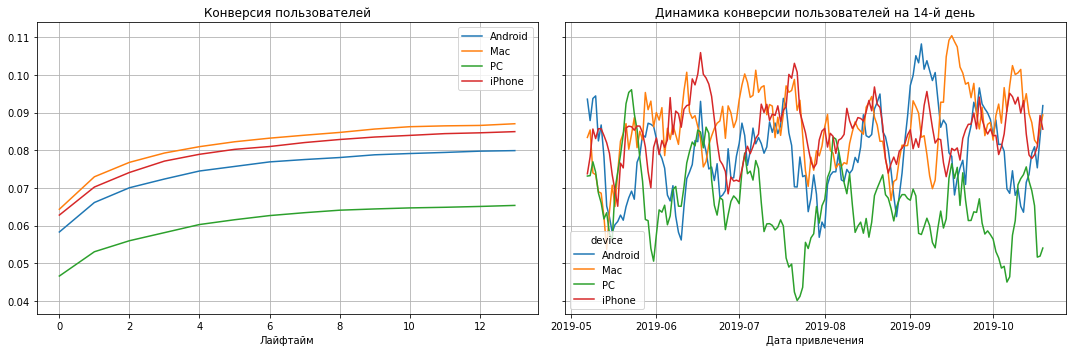

In [71]:
# строим графики кривой конверсии и  истории изменений конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
   profiles, 
   orders,
   observation_date,
   horizon_days, 
   dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<span class="mark">**Наблюдение:**</span> 
Судя по графикам, пользователи **PC конвертируются намного хуже** других устроиств. Также наблюдаются значительные **провалы в июле и октябре**. Если рассматривать другие устройства, конверсия имеет медленный и незначительный рост. **Лидером по конверсии является Mac.** 

Ниже рассмотрим коэффициент удержания и поймем причину.


##### Построим и изучим график конверсии в разрезе стран

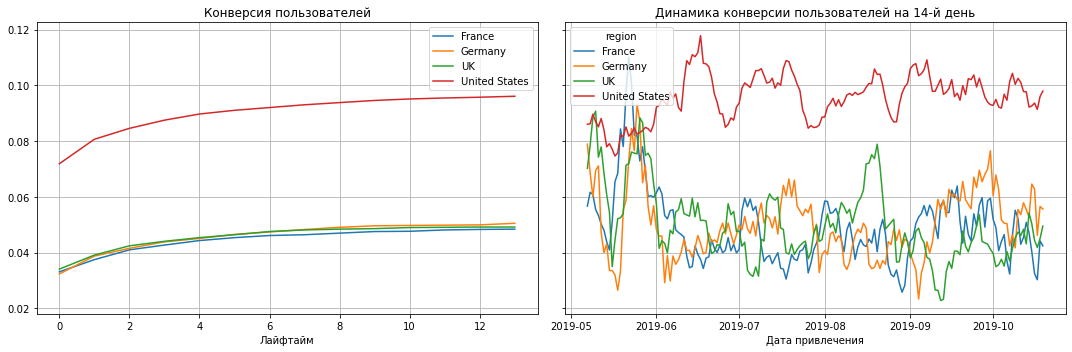

In [65]:
# строим графики кривой конверсии и  истории изменений конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
   profiles, 
   orders,
   observation_date,
   horizon_days, 
   dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<span class="mark">**Наблюдение:**</span> 
Лидером по конверсии является США, который обогнал другие страны в 2 раза. Остальные страны имеют конверсию около 5%. На графике динамики пользователей, видны резкие "вспышки" ближе к концу мая по таким странам, как Франция, Германия и Великобритания, возможно была акрессивная акция по привлечению пользователей. Такая же "вспышка" наблюдается в середине августа в Великобритании.

<span class="pirk">**Рекомендация:**</span> Стоит детально проанализировать "вспышки" на предмет маркентинговой активности и возможно повторить.

##### Построим и изучим график конверсии в разрезе рекламных каналов

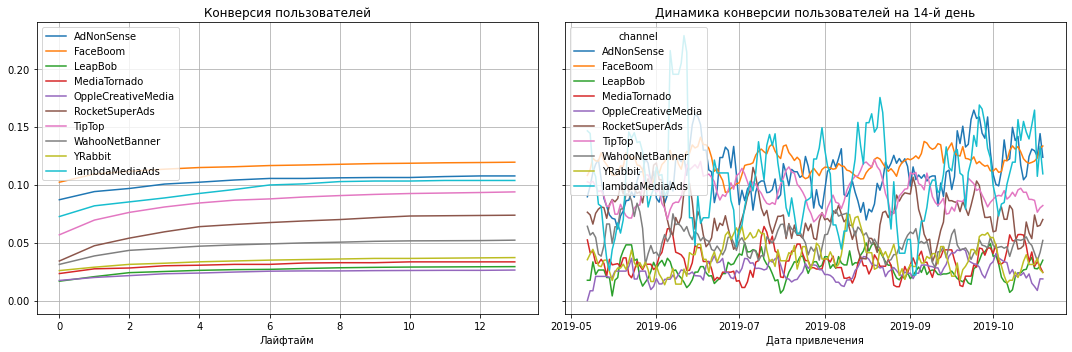

In [72]:
# строим графики кривой конверсии и  истории изменений конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
   profiles, 
   orders,
   observation_date,
   horizon_days, 
   dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<span class="mark">**Наблюдение:**</span> Конверсия не имеет "здоровый" восходящий тренд, а больше похода на стагнацию.
Конверсия у TipTop не самая высокая. Она ниже, чем CR у FaceBoom. Также можно заметить резкий "всплек" у lambdaMediaAds в июне. Значит пользователей что-то привлекло в этот период и они купили платную подписку.

####  Проверим удержанием пользователей и динамику её изменения.  Изучим график удержания в разрезе устройств, стран и рекламных каналов.

Построим график истории изменений удержания на конец второй недели, передав функции `plot_retention()` таблицу динамики удержания `retention_history` и день «жизни» для изучения — `14`.

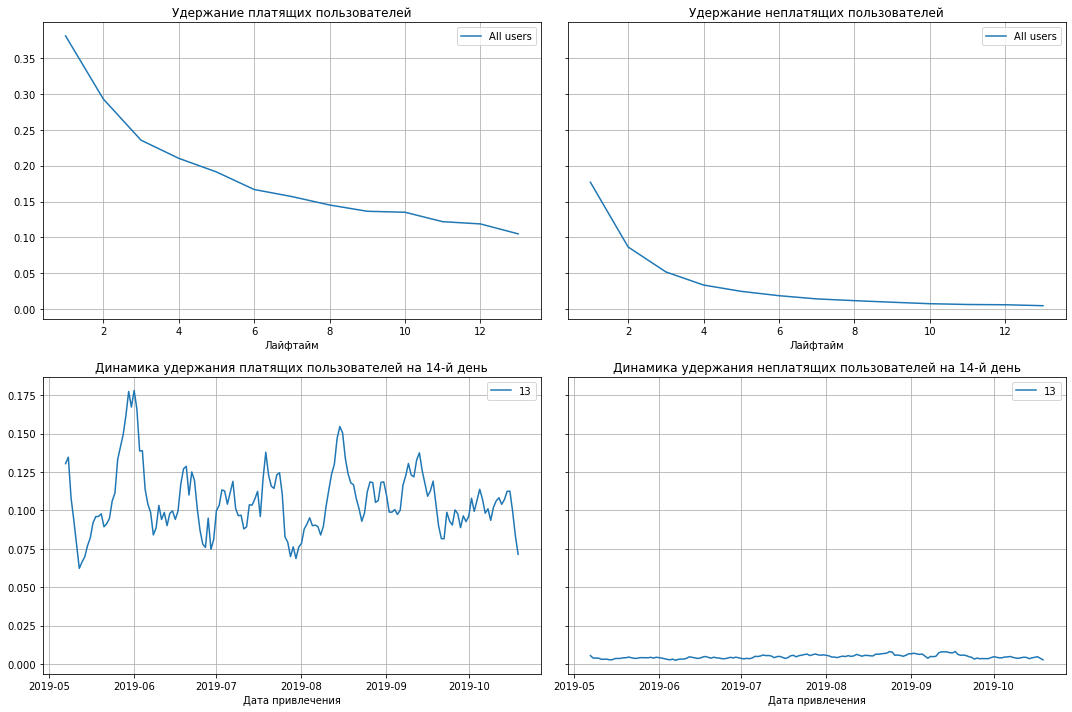

In [62]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)
plot_retention(retention, retention_history, 14)

<span class="mark">**Наблюдение:**</span> 
Удержание неплатящих на графиках истории изменений значительно ниже, чем удержание платящих. Впрочем, как и следовало ожидать.
На данном этапе нельзя сделать определённых выводов. Так как проблема вызвана девайсами, стоит посмотреть удержание пользователей по девайсам. Так можно понять насклько рационально будет уделить приоритетное внимание устранения багов на РС.

`Рассмотрим удержание пользователей в разрезе устройств, стран и рекламных каналов`

##### Построим и изучим график удержание пользователей в разрезе устройств

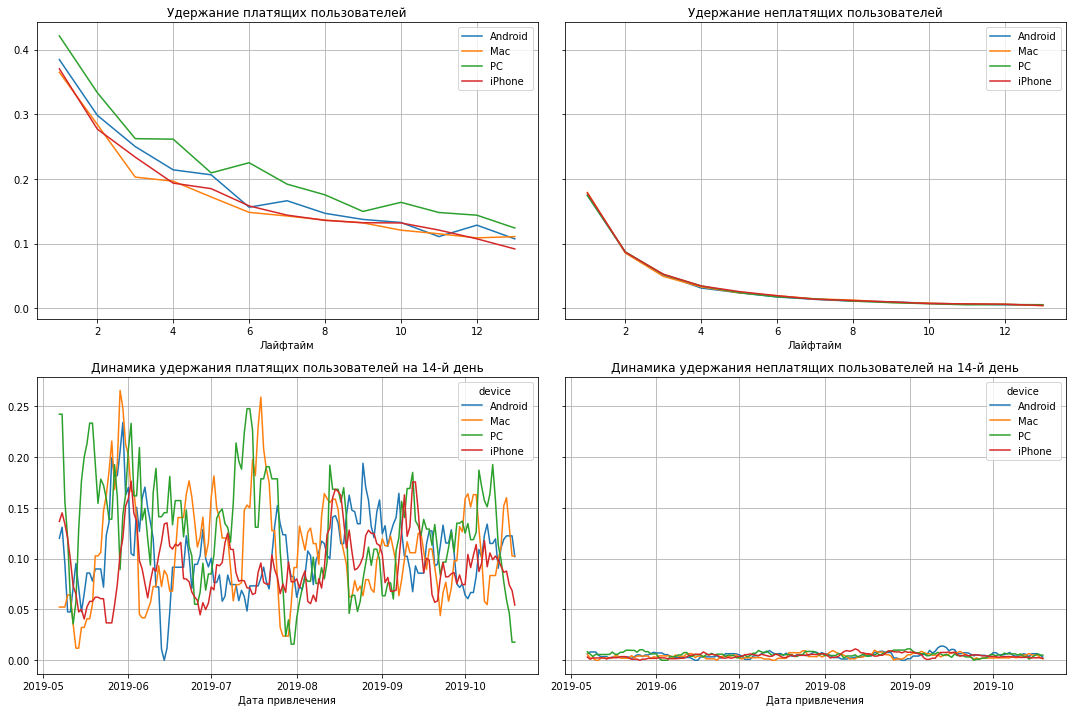

In [68]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention, retention_history, 14)

<span class="mark">**Наблюдение:**</span> Удержание неплатящих пользователей не зависит от девайса, однако удержание на РС выше, чем на других девайсах. Значит и правда стоит уделить особое внимание техническим ошибкам на РС. Кроме этого, динамика удержания платящих пользователей нам показывает нестабильность по удержанию на Mac и PC.

##### Построим и изучим график удержание пользователей в разрезе стран

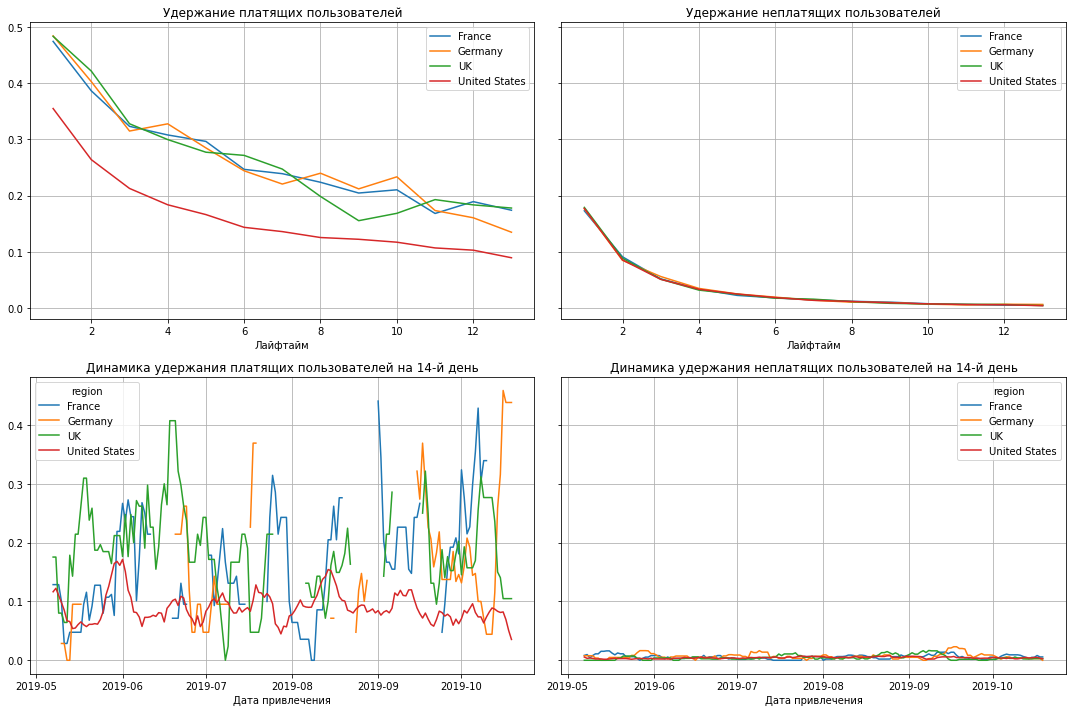

In [69]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)
plot_retention(retention, retention_history, 14)

<span class="mark">**Наблюдение:**</span> Согласно графикам, видно, что при высокой конверсии в США, мы видим **самый низкий коэффициент по удержанию пользователей**. Кроме этого, динамика удержания платящих пользователей нам показывает нестабильный и "рванный" график. 

<span class="pirk">**Рекомендация:**</span> Стоит серьезно задуматься над лояльностью пользователей, так как при "правильной" стратегии конкурентов, клиенты могут сразу перейти к них.


##### Построим и изучим график удержание пользователей в разрезе рекламных каналов



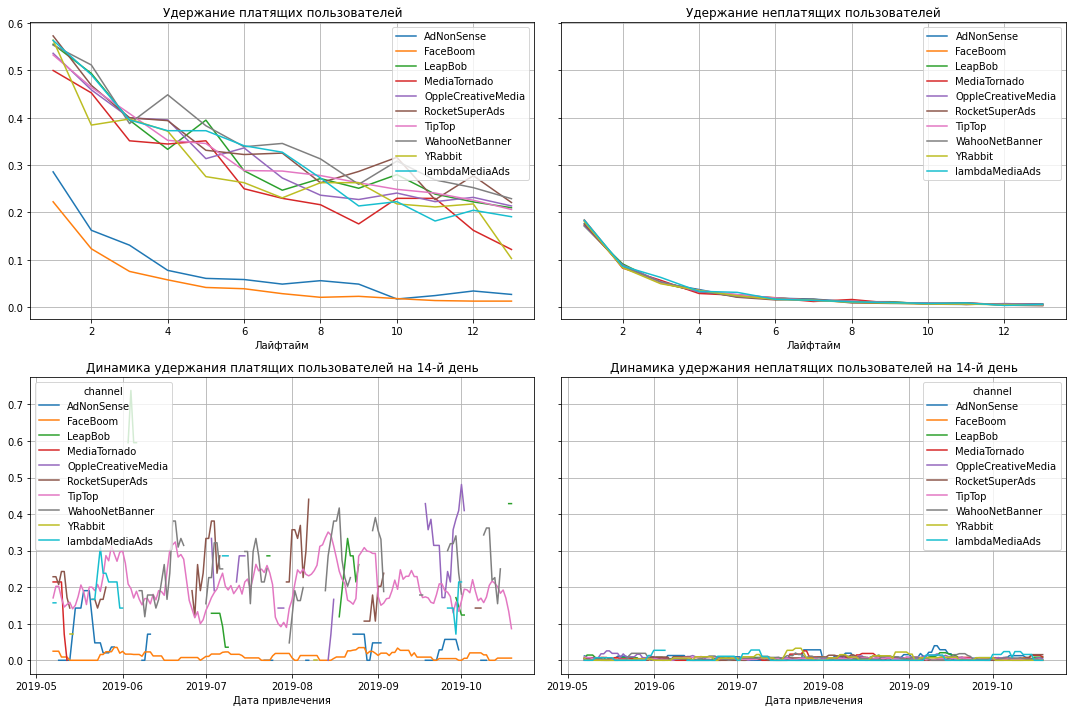

In [70]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention, retention_history, 14)

<span class="mark">**Наблюдение:**</span> Самое низкое удержание платящих пользователей у FaceBoom и AdNonSense.

####  Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

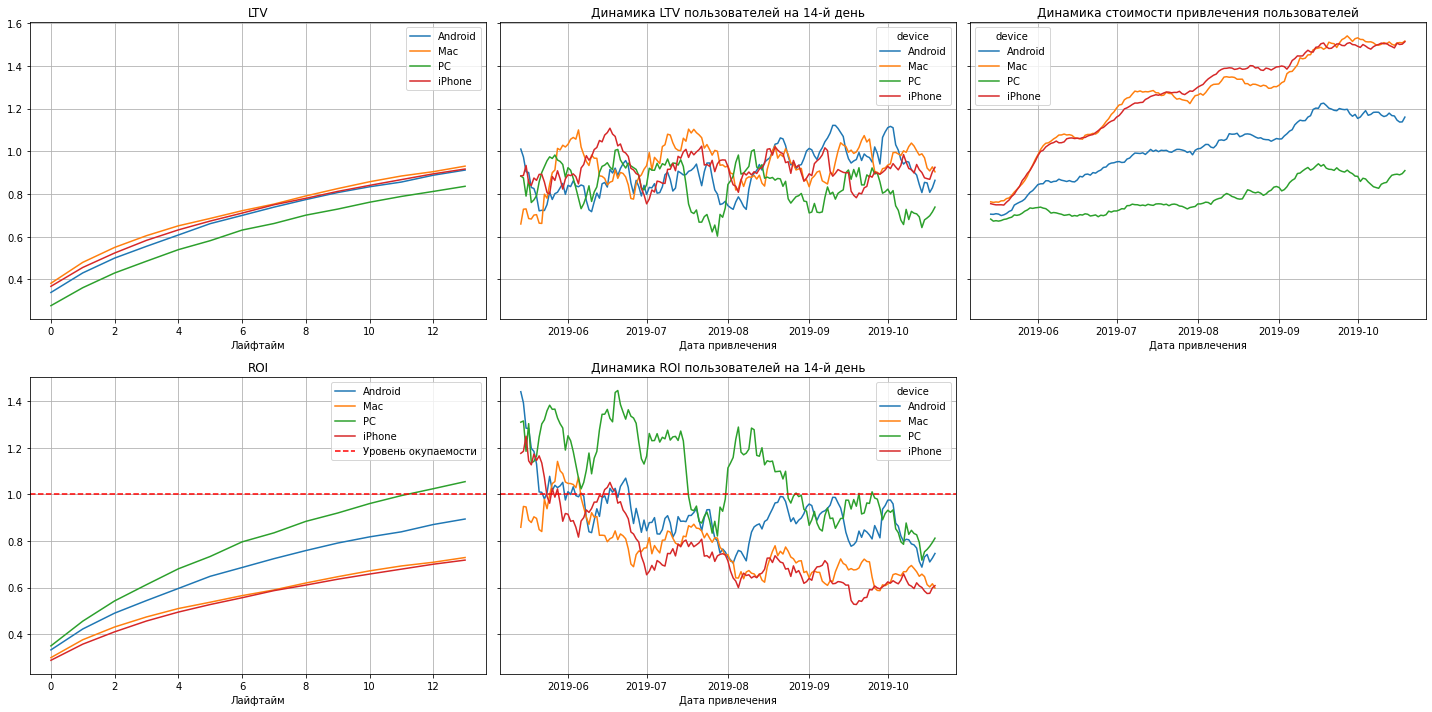

In [63]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<span class="mark">**Наблюдение:**</span>  
- LTV показатель достаточно стабилен и имеет восходящий тренд. 
- Реклама не окупается. Пользователи Android, Mac, IPhone не окупаются, а вот владельцы PC — вышли на окупаемость с 11 дня, что тоже не является положительным фактором. 
- CAC значительно увеличился. Лидерами роста CAC стали пользователи IPhone и Mac.



####  Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

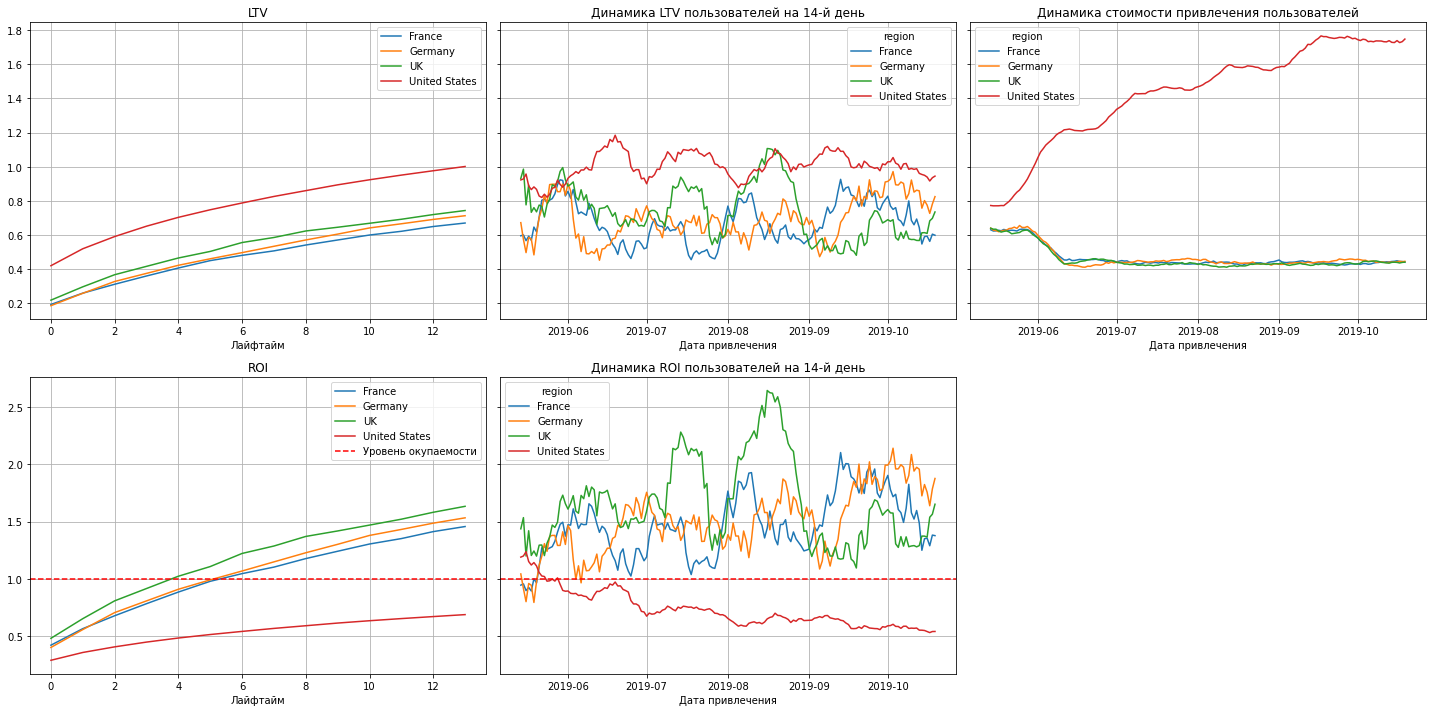

In [73]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<span class="mark">**Наблюдение:**</span> 
- LTV показатель достаточно стабилен и имеет восходящий тренд. 
- Реклама окупается после 4-го дня, кроме страны США. ROI положительный в странах Великобритания, Германия и Франция. 
- CAC значительно увеличился в США с июня 2019, хотя остальные страны имеют стабильную стоимость привлечеия пользователей.

<span class="pirk">**Рекомендация:**</span> Стоит пересмотреть активности в США.

####  Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

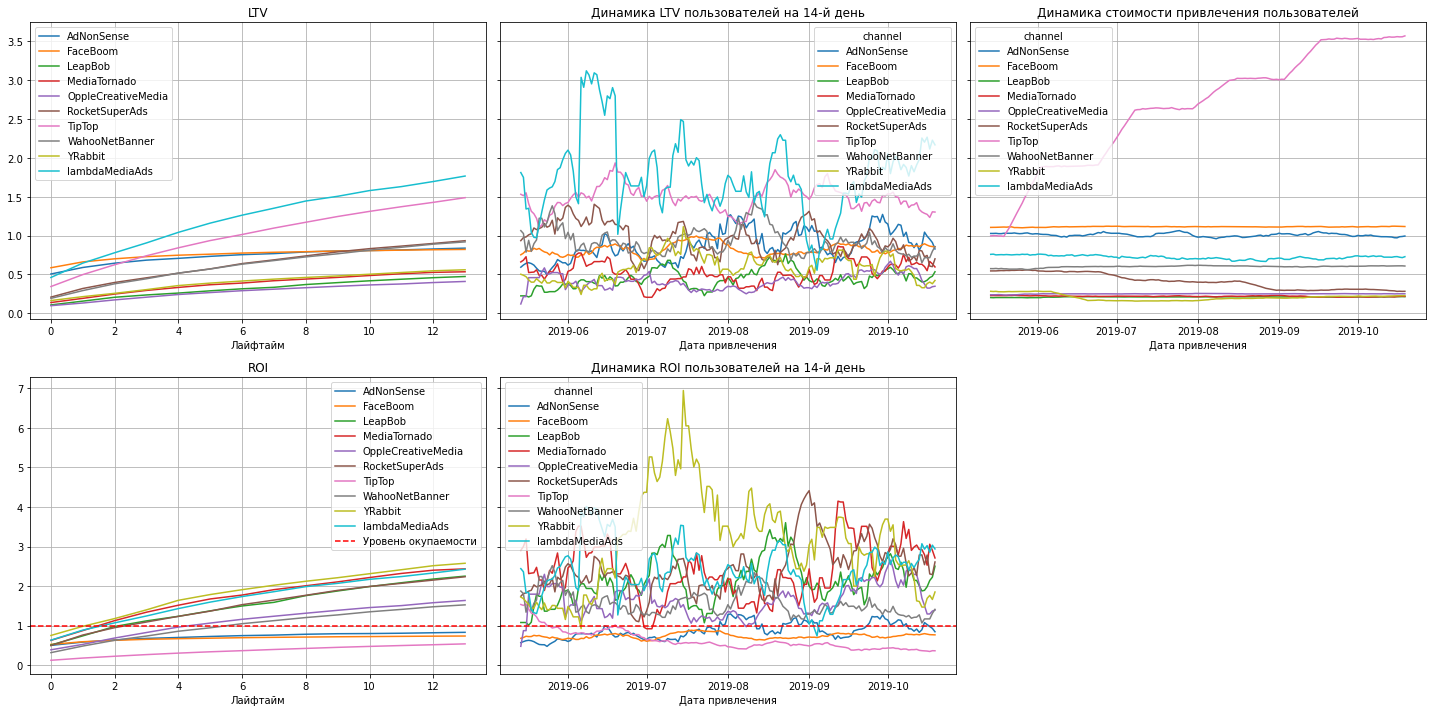

In [74]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<span class="mark">**Наблюдение:**</span> 
- LTV у разных рекламных источников значительно отличаются. 
- Реклама окупается после 2-го дня, кроме TipTop, FaceBoom и AdNonSense. Лилерами ROI являются YRabbit и Media Tornado. 
В июле также наблюдается положительная "вспышка" из YRabbit, что принесло высокую окупаемость инвестиций в маркетинг.

- Самый высокий и восходящий тренд по CAC у TipTop, хотя остальные источники имеют стабильную стоимость привлечения пользователей.

<span class="pirk">**Рекомендация:**</span> 
Стоит пересмотреть размещение рекламы в TipTop, тк она не эффективна.

- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Из выше сказаного, мы определили, что самыми не эффективными являются:
- страна США
- устройства IPhone и Mac
- рекламные каналы-TipTop

посмотрим эту взаимосвязь с помощью таблиц

In [75]:
# построим таблицу в разрезе стран и рекламных источников
profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='count')

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


In [76]:
# построим таблицу в разрезе страны и устройства
profiles.pivot_table(index='device', columns='region', values='user_id', aggfunc='count')

region,France,Germany,UK,United States
device,,,,
Android,3313,2849,3243,12436
Mac,1163,1020,1086,15424
PC,4384,3797,4551,6421
iPhone,2198,1862,2274,27548


<span class="mark">**Наблюдение:**</span> 
Все пользователи TipTop и FaceBoom из США. Очень много пользователей из США пользуются Mac или iPhone.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**`ВЫВОД- причины неэффективности привлечения пользователей`**: 
<div style="border:solid orange 2px; padding: 20px"> 

В исходном датасете `'visits'` 309901 строк и 6 столбцов, `'orders'` 40212 строк и 3 столбца и `'costs'` 1800 строк и 3 столбца. Итого — 150008 пользовательских профилей.
    
<span class="girk">'Страна'</span>       
    
1) Согласно графикам, видно, что при высокой конверсии в США, мы видим самый низкий коэффициент по удержанию пользователей. Кроме этого, динамика удержания платящих пользователей нам показывает нестабильный и "рванный" график. 
    
2) Реклама окупается после 4-го дня, кроме страны США. 
    
3) CAC значительно увеличился в США с июня 2019, хотя остальные страны имеют стабильную стоимость привлечения пользователей.
    
    
<span class="girk">'Устройства'</span>

1) Пользователи PC конвертируются намного хуже других устроиств. Также наблюдаются значительные провалы в июле и октябре. Если рассматривать другие устройства, конверсия имеет медленный и незначительный рост. Лидером по конверсии является Mac.
    
2)  Удержание неплатящих пользователей не зависит от девайса, однако удержание на РС выше, чем на других девайсах. Значит и правда стоит уделить особое внимание техническим ошибкам на РС. Кроме этого, динамика удержания платящих пользователей нам показывает нестабильность по удержанию на Mac и PC.
    
3) Реклама не окупается. Пользователи Android, Mac, IPhone не окупаются, а вот владельцы PC — вышли на окупаемость с 11 дня, что тоже не является положительным фактором.
    
4) CAC значительно увеличился. Лидерами роста CAC стали пользователи IPhone и Mac.
    
5) LTV у разных рекламных источников значительно отличаются.
  
<span class="girk">'Рекламные каналы'</span> 
1) Самой дорогой стоимостью за привлечение одного пользователя считается источник TipTop (2.80) и превышает среднюю стоимоть привлечения клиентов (0.70) в 4 раза .
    
2) Конверсия не имеет "здоровый" восходящий тренд, а больше похож на стагнацию. Конверсия у TipTop не самая высокая. Она ниже, чем CR у FaceBoom. Также можно заметить резкий "всплек" у lambdaMediaAds в июне. Значит пользователей что-то привлекло в этот период и они купили платную подписку.
    
3) Самое низкое удержание платящих пользователей у FaceBoom и AdNonSense.
    
4)Реклама окупается после 2-го дня, кроме TipTop, FaceBoom и AdNonSense. Лилерами ROI являются YRabbit и Media Tornado. В июле также наблюдается положительная "вспышка" из YRabbit, что принесло высокую окупаемость инвестиций в маркетинг.
    
</div>

**`ВЫВОД- рекомендации для отдела маркетинга`**: 
<div style="border:solid orange 2px; padding: 20px"> 
                        
<span class="girk">'Страна'</span>   
1) Стоит детально проанализировать "вспышки"в мае, на предмет маркентинговой активности и возможноти их повторить в Великобритании, Германии и Франции.
    
2) Стоит серьезно задуматься над лояльностью пользователей в Великобритании, Германии и Франции, так как при "правильной" стратегии конкурентов, клиенты могут сразу перейти к ним.
    
3) Стоит пересмотреть активности в США в сторону Великобритании и Германии.
    
<span class="girk">'Устройства'</span>
1) Возможно стоит обратить внимание на юзобилити мобильного приложения, тк есть возможность увеличить долю плательщиков.
    
2) Стоит обратить внимание на позиционирование в поисковых системах и выдачу ссылок по ключевым словам (SEO). При правильном позиционировании в посковых системах, есть возможность увеличить долю плательщиков.

3) Стоит обратить внимание на пользователей РС и Android, так как эти пользователи хорошо удерживаются.
    
<span class="girk">'Рекламные каналы'</span> 
1) Стоит пересмотреть размещение рекламы в TipTop, тк она не эффективна. 
    
2) Самый высокий LTV у канала lambdaMediaAds, также он в тройке по конверсии, у него достаточно большое удержание пользователей, окупаемость также на 3 месте.
    
</div>